# 1. Reading the data and initializing Wavepal

Start importing wavepal and other usual packages

In [1]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import copy
import wavepal as wv

In [2]:
mypath="../../figures/convergence_percentiles/"

Read the data

In [3]:
data=np.genfromtxt("data/ODP1148-BF-18O.txt")
myt=data[:,0]
mydata=data[:,1]

Initialize the class called Wavepal (which is a class of the package wv)

In [4]:
x=wv.Wavepal(myt, mydata, "Age", "$\delta{}^{18}O$", t_units="ka", mydata_units="permil")

# 2. Preliminary analysis

Check the data set

In [5]:
x.check_data()

Figure of the trend.

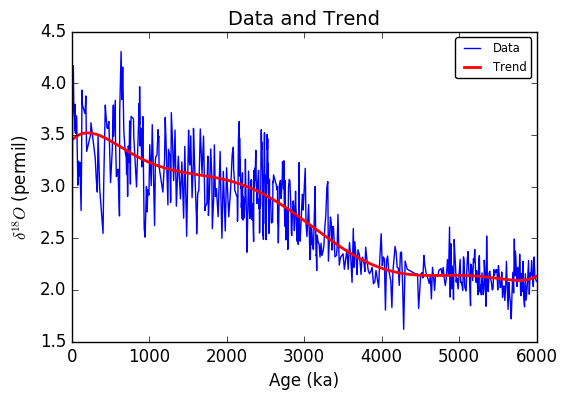

In [6]:
plot_trend=x.plot_trend(pol_degree=7)  
plot_trend.show()

and choose the degree of the polynomial for the subsequent analyses

In [7]:
x.choose_trend_degree(7)

Compute some variables related to the trend

In [8]:
x.trend_vectors()

# 3. CARMA(p,q) Background Noise Analysis

Analytical confidence levels

In [9]:
x.carma_params(signif_level_type="a")

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  19

SECOND ROUND: generates  19000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples):  13
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  1462  MCMC samples.
Median parameters:
--------------------
alpha:  0.169005958478
std white noise:  0.149823728281


# 4. Time-Frequency Analysis w0=5.5

## 4.1. 95th percentile

Choose the $\textrm{x}^{\textrm{th}}$ percentiles for significance testing

In [10]:
percentile=np.zeros(1)
percentile[0]=95.

In [11]:
x.timefreq_analysis(percentile=percentile,w0=5.5,permin=10.,n_moments=20)

  1%|          | 4/608 [00:00<00:18, 32.28it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/133 [00:00<?, ?it/s]/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/percentile_n_moments.py:68: RuntimeWarning: invalid value encountered in divide
/Users/admin/Library/Python/2.7/lib/python/site-packages/WAVEPAL-3.6-py2.7.egg/wavepal/percentile_n_moments.py:69: RuntimeWarning: invalid value encountered in divide
  1%|          | 1/133 [00:00<00:23,  5.56it/s]

Re-estimated period range: from  10.0  to  970.058602567
Main loop, over the time-frequency plane:


100%|██████████| 133/133 [05:55<00:00,  4.29s/it]


Figure of the scalogram

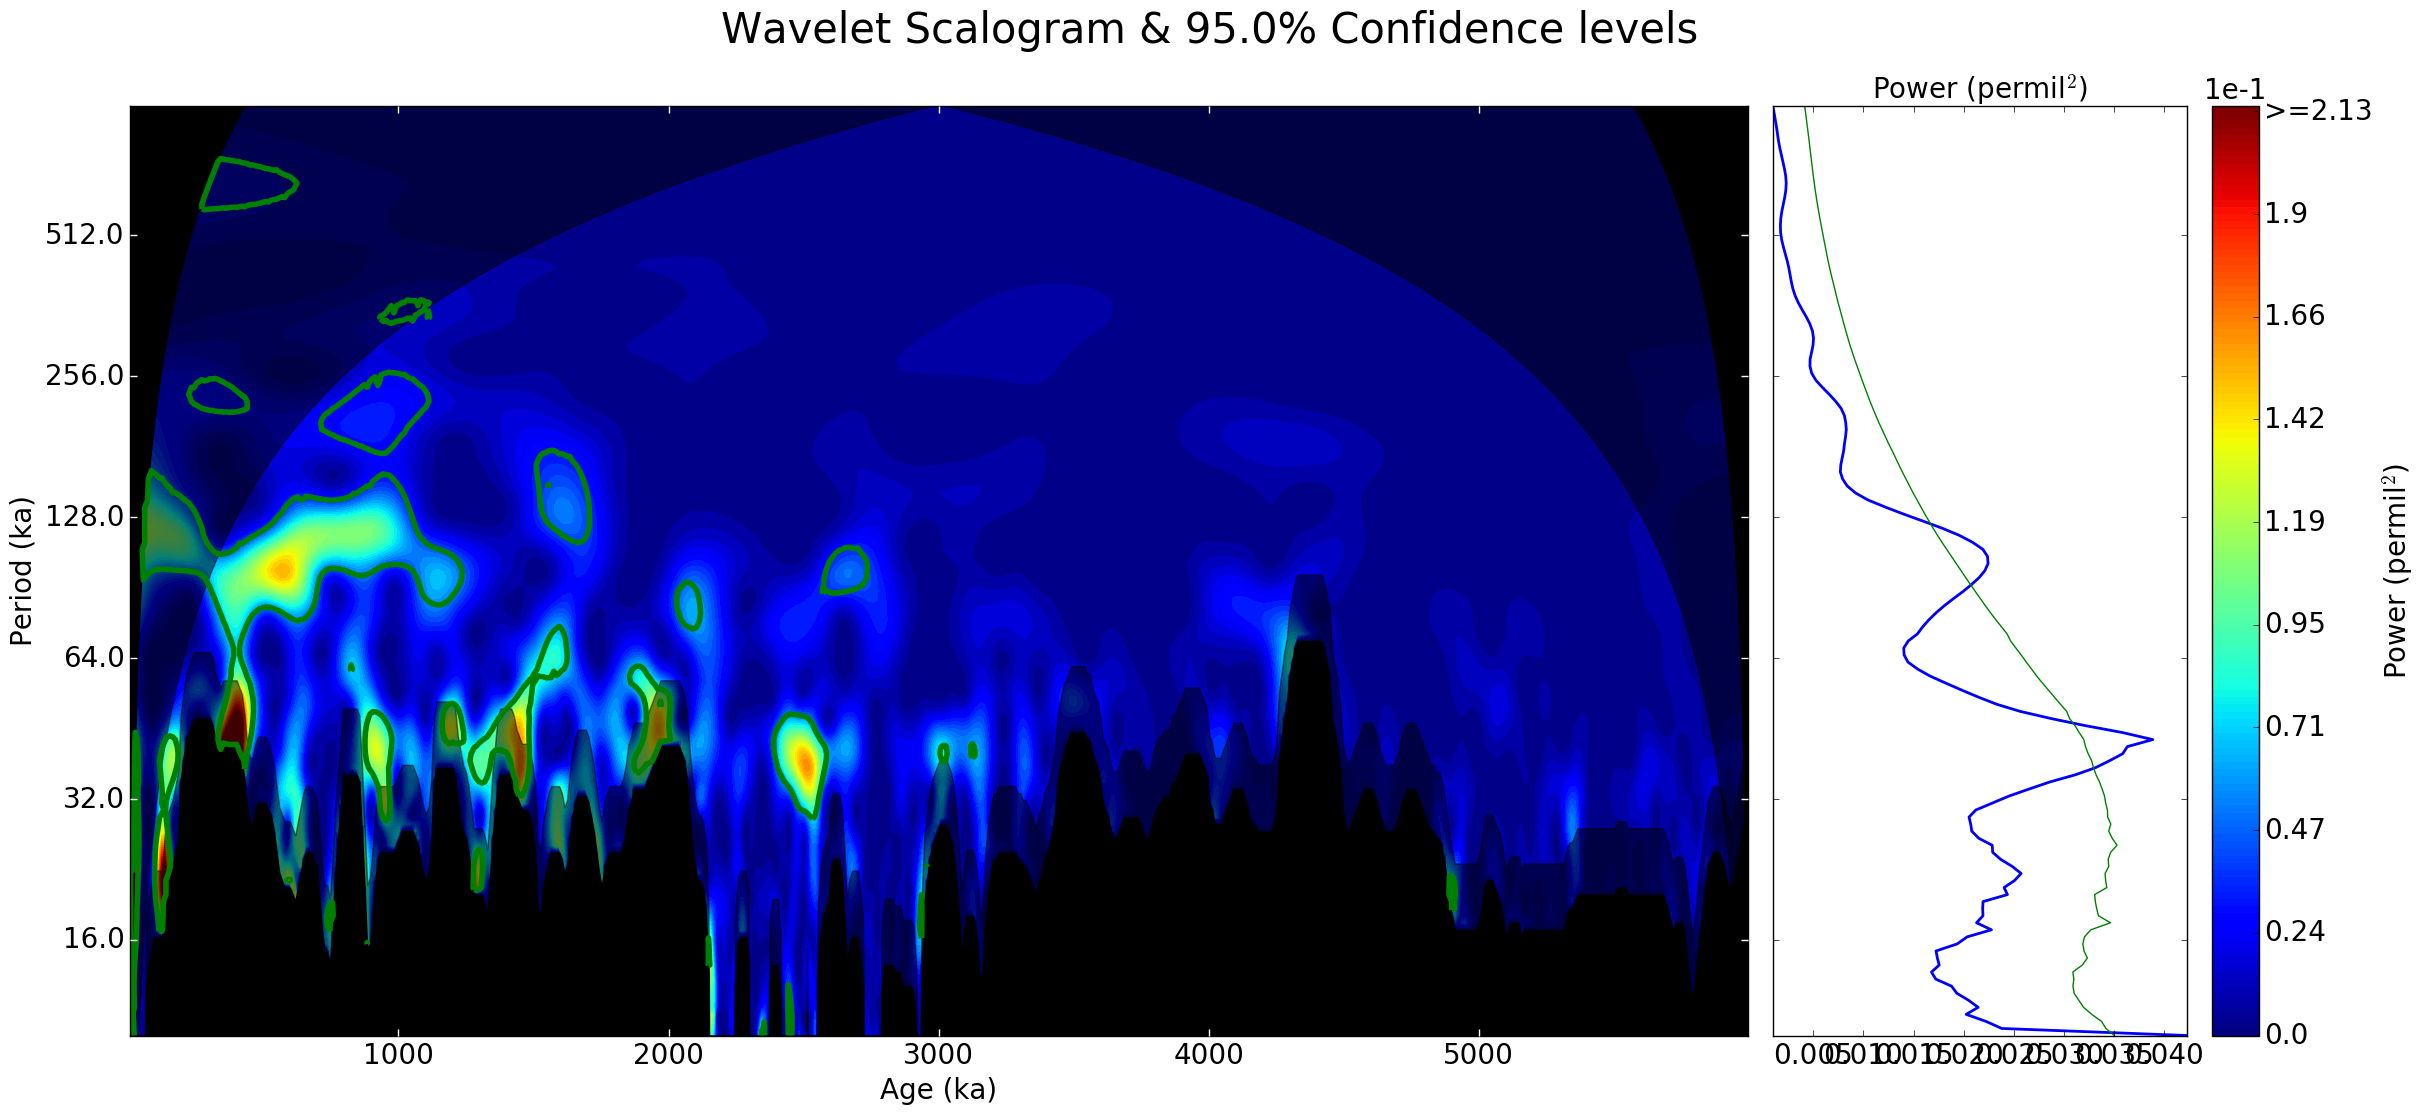

In [12]:
plot_scalogram=x.plot_scalogram(color_cl_anal=['g'],color_cl_mcmc=['m'],fontsize_title=30,fontsize_axes=20,fontsize_ticks=20,linewidth_cl=4,global_scal_xlabel_ticks="bottom",decimals=2,linewidth_gscal=2.0)
fig = plt.gcf() 
fig.set_size_inches(24,12)

Check the convergence of the analytical confidence levels

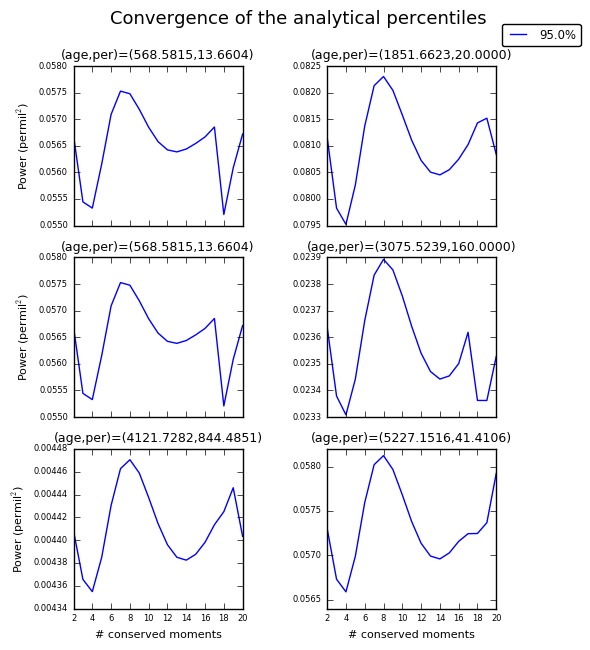

In [13]:
plot_check_convergence_percentiles_cwt=x.plot_check_convergence_percentiles_cwt(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
fig = plt.gcf()
fig.set_size_inches(6,7)
plot_check_convergence_percentiles_cwt.savefig(mypath+"check_convergence_percentiles_cwt_95.pdf")
plot_check_convergence_percentiles_cwt.show()

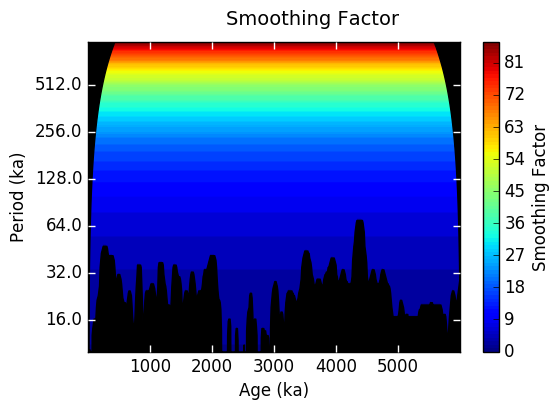

In [14]:
plot_smoothing_fact=x.plot_smoothing_factor()

## 4.2. 99,9th percentile

In [15]:
percentile=np.zeros(1)
percentile[0]=99.9

In [16]:
x.timefreq_analysis(percentile=percentile,w0=5.5,permin=10.,n_moments=20)

  1%|          | 6/608 [00:00<00:10, 57.96it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  1%|          | 1/133 [00:00<00:17,  7.43it/s]

Re-estimated period range: from  10.0  to  970.058602567
Main loop, over the time-frequency plane:


100%|██████████| 133/133 [05:43<00:00,  4.47s/it]


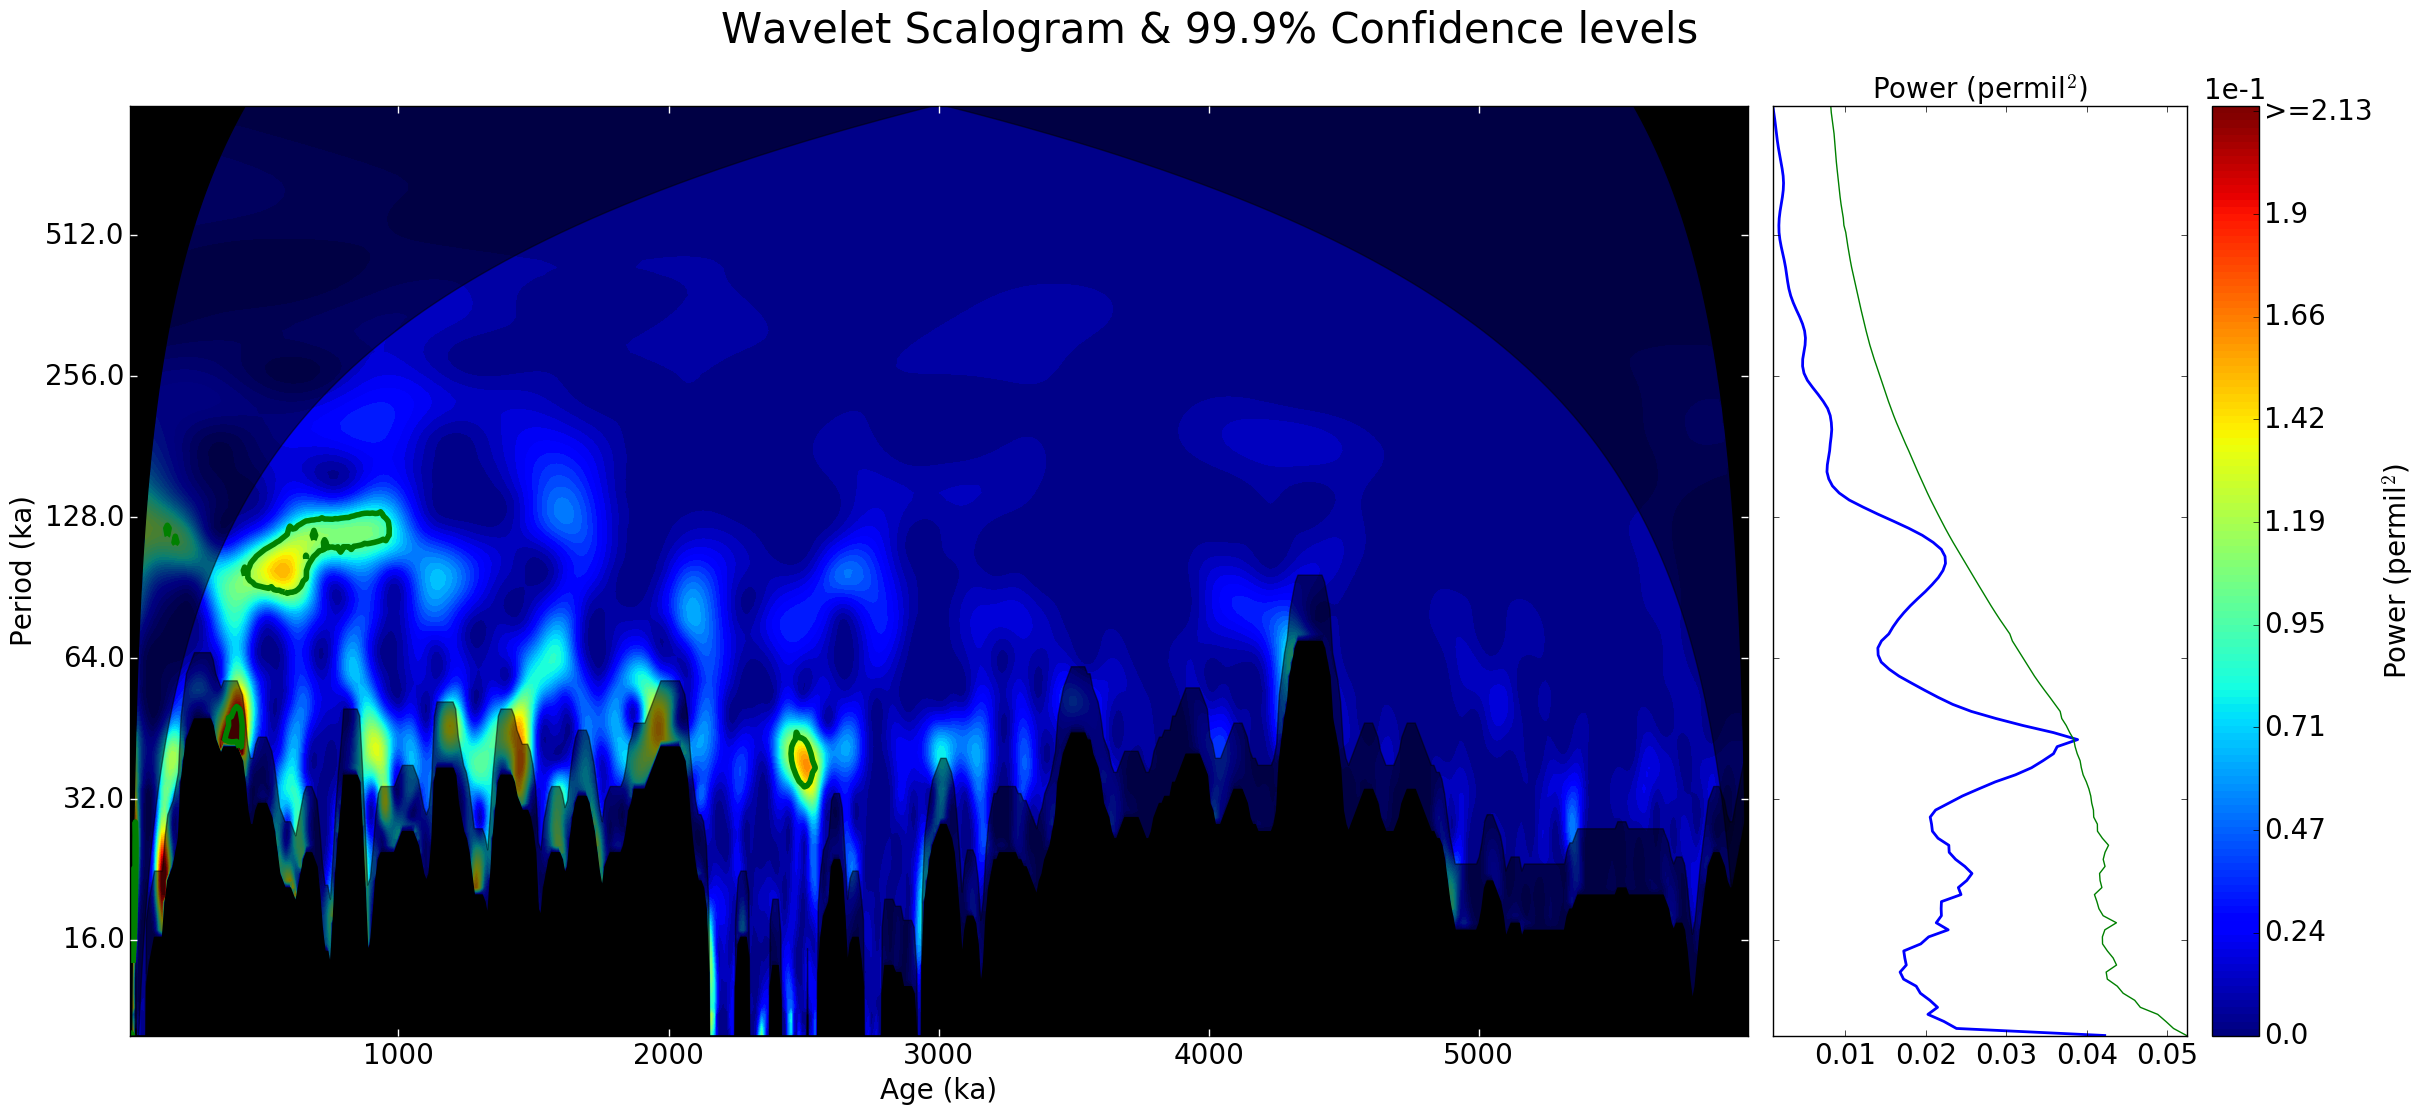

In [17]:
plot_scalogram=x.plot_scalogram(color_cl_anal=['g'],color_cl_mcmc=['m'],fontsize_title=30,fontsize_axes=20,fontsize_ticks=20,linewidth_cl=4,global_scal_xlabel_ticks="bottom",decimals=2,linewidth_gscal=2.0)
fig = plt.gcf() 
fig.set_size_inches(24,12)

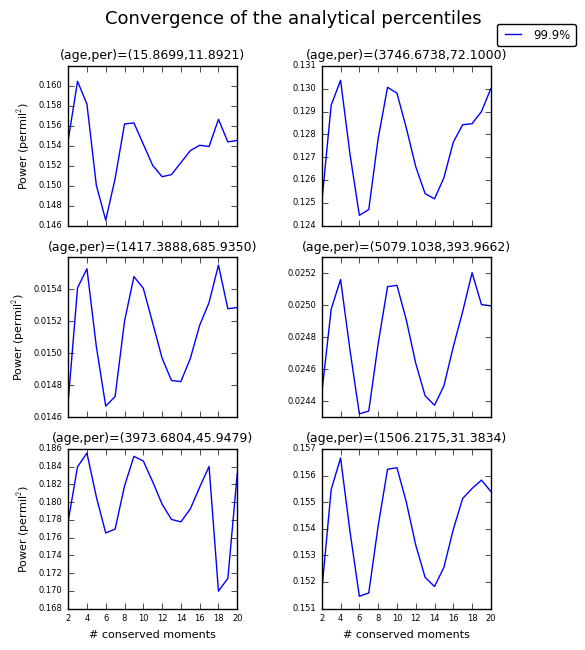

In [18]:
plot_check_convergence_percentiles_cwt=x.plot_check_convergence_percentiles_cwt(fontsize_suptitle=13,fontsize_title=9,fontsize_axes=8,fontsize_ticks=6)
fig = plt.gcf()
fig.set_size_inches(6,7)
plot_check_convergence_percentiles_cwt.savefig(mypath+"check_convergence_percentiles_cwt_99,9.pdf")
plot_check_convergence_percentiles_cwt.show()

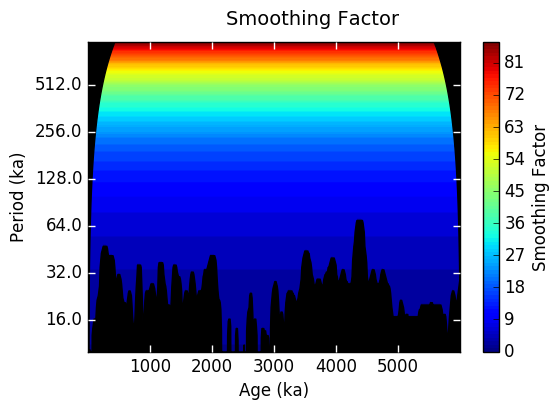

In [19]:
plot_smoothing_fact=x.plot_smoothing_factor()